In [21]:
# Import library yang diperlukan
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from functools import reduce

In [22]:
# Inisialisasi galeri untuk menyimpan hasil latihan
galeri_latihan = []

# Load gambar
img_original = Image.open(r"D:\Prak. Fungsional\modul6\images\patrick.jpg")
img_original = img_original.convert('RGB')
img_array = np.array(img_original)

print(f"Gambar berhasil dimuat: {img_array.shape}")

# Fungsi helper untuk menampilkan gambar
def buat_penampil(cols=3, figsize=(12,4)): 
    def tampilkan(img_list, titles=None, cmaps=None): 
        rows = (len(img_list) + cols - 1) // cols 
        plt.figure(figsize=figsize) 
 
        for i, img in enumerate(img_list, 1): 
            plt.subplot(rows, cols, i) 
 
            if cmaps and i-1 < len(cmaps) and cmaps[i-1]: 
                plt.imshow(img, cmap=cmaps[i-1]) 
            else: 
                plt.imshow(img) 
 
            plt.axis('off') 
 
            if titles and i-1 < len(titles): 
                plt.title(titles[i-1]) 
 
        plt.tight_layout() 
        plt.show() 
    return tampilkan

penampil = buat_penampil()

Gambar berhasil dimuat: (225, 225, 3)


In [23]:
# Latihan 1: Resize
lat1_img = np.array(Image.fromarray(img_array).resize((200, 200)))
galeri_latihan.append(("Latihan 1: Resize", lat1_img))

# Latihan 2: Brightness
lat2_img = np.clip(img_array * 2.0, 0, 255).astype(np.uint8)
galeri_latihan.append(("Latihan 2: Brightness", lat2_img))

# Latihan 3: Crop
h, w = img_array.shape[:2]
lat3_img = img_array[h//4:3*h//4, w//4:3*w//4]
galeri_latihan.append(("Latihan 3: Crop", lat3_img))

# Latihan 4: Rotate
lat4_img = np.array(Image.fromarray(img_array).rotate(45, expand=True, fillcolor=(255, 255, 255)))
galeri_latihan.append(("Latihan 4: Rotasi", lat4_img))

print(f"Galeri latihan berisi {len(galeri_latihan)} gambar")

Galeri latihan berisi 4 gambar


Menampilkan 4 gambar dari galeri.


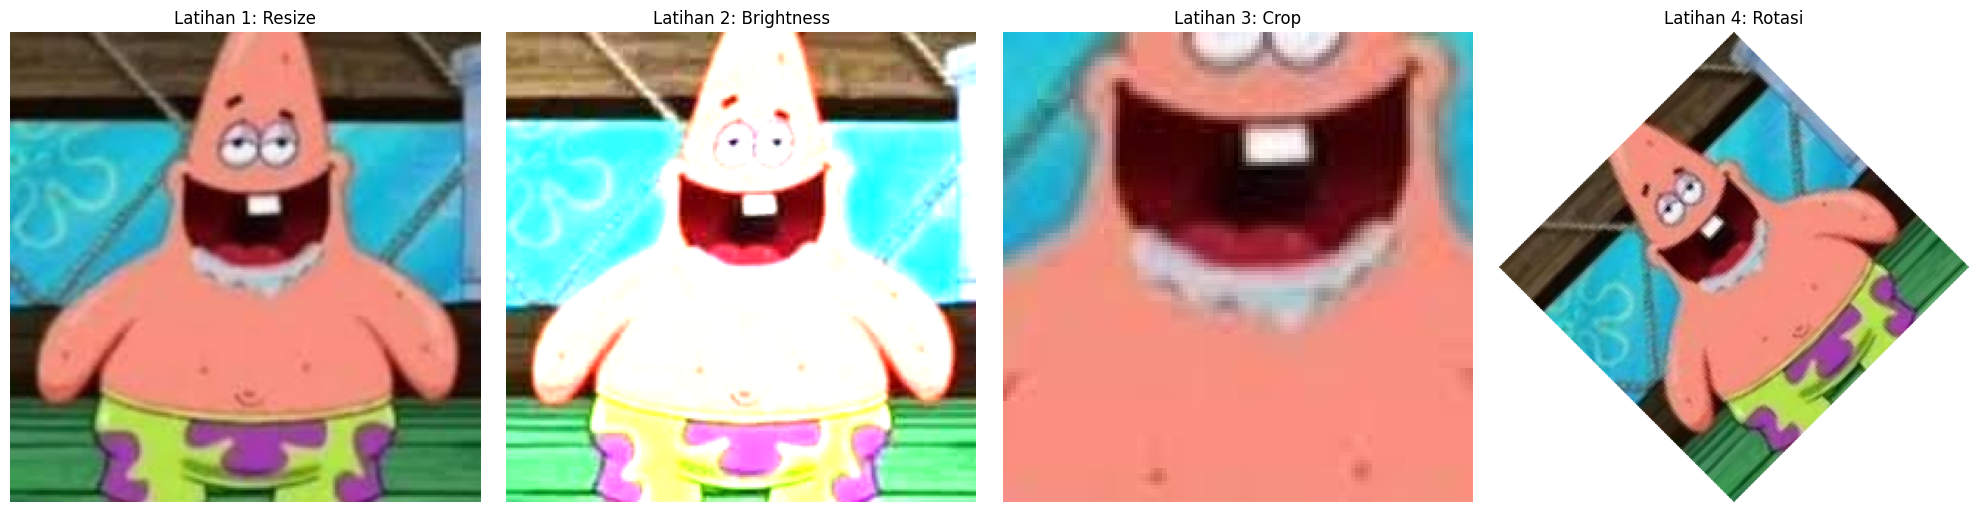


Codelab 1 selesai!


In [24]:
import matplotlib.pyplot as plt

jumlah_latihan = len(galeri_latihan)

print(f"Menampilkan {jumlah_latihan} gambar dari galeri.")

fig, axes = plt.subplots(1, jumlah_latihan, figsize=(5 * jumlah_latihan, 5))

for i, (judul_gambar, objek_gambar) in enumerate(galeri_latihan):
    
    if jumlah_latihan > 1:
        ax = axes[i]
    else:
        ax = axes
    
    ax.imshow(objek_gambar)
    
    ax.set_title(judul_gambar)
    
    ax.axis('off')

plt.tight_layout()
plt.show()

print("\nCodelab 1 selesai!")

Gambar original dimuat: (225, 225)

Gambar setelah pipeline: (112, 112)
Mode: L


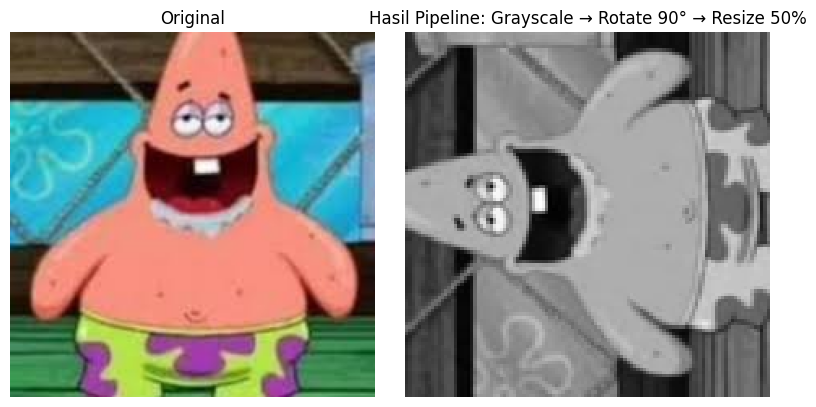


✅ Codelab 2 selesai!


In [27]:
from functools import reduce
from PIL import Image

image = Image.open(r'D:\Prak. Fungsional\modul6\images\patrick.jpg')

print(f"Gambar original dimuat: {image.size}")

def to_grayscale(image):
    # TODO:
    return image.convert("L")

def rotate_90(image):
    return image.rotate(90, expand=True)

def resize_half(image):
    # TODO: Ambil ukuran gambar saat ini
    w, h = image.size
    # TODO: Return gambar yang sudah di-resize menjadi setengah ukuran
    return image.resize((w // 2, h // 2))


# Susun fungsi-fungsi di atas ke dalam sebuah list.
transformation_pipeline = [
    to_grayscale,      # 1. Fungsi Grayscale
    rotate_90,         # 2. Fungsi Rotate
    resize_half        # 3. Fungsi Resize
]


# Gunakan reduce untuk mengaplikasikan fungsi secara berantai.
def apply_transformation(image, func):
    # TODO: Terapkan fungsi 'func' ke 'image'
    return func(image)

# Jalankan reduce
# Hint: Argumen ke-3 adalah gambar awal (image)
processed_image = reduce(apply_transformation, transformation_pipeline, image)

print(f"\nGambar setelah pipeline: {processed_image.size}")
print(f"Mode: {processed_image.mode}")

# Tampilkan Hasil (Jangan diubah)
import matplotlib.pyplot as plt

penampil(
    [image, processed_image],
    ["Original", "Hasil Pipeline: Grayscale → Rotate 90° → Resize 50%"],
    [None, 'gray']
)

print("\n✅ Codelab 2 selesai!")